## Questionamentos a serem levantados (1 etapa)

ordenamento de dataset e importante para analise?

Quais as hipoteses possiveis?

Quais as colunas sao desnecessarias?

Tratamento de outliers e valores NaN


#### Agrupar os bairros pela zona do SP. (criar nova coluna)

Centro Ampliado-  Sé, Bela Vista, Bom Retiro, 
Cambuci, Consolação, Liberdade, República , Santa Cecília, Pinheiros, Alto de Pinheiros, Itaim 
Bibi, Jardim Paulista, Lapa, Perdizes, Vila Leopoldina, 
Jaguaré, Jaguara, Barra Funda, Butantã, Morumbi, Raposo 
Tavares, Rio Pequeno, Vila Sônia, Vila Mariana, Saúde, Moema, 
Ipiranga, Cursino, Sacomã, Jabaquara, Campo Belo.

Sul -  Cidade Ademar, Pedreira, Campo Limpo, 
Capão Redondo, Vila Andrade, Jardim Ângela, Jardim São Luís, 
Socorro, Cidade Dutra, Grajaú, Parelheiros, Marsilac , Santo 
Amaro e Campo Grande.

Norte - Tremembé, Jaçanã, Vila Maria, Vila 
Guilherme, Vila Medeiros, Santana, Tucuruvi, Mandaqui, Casa 
Verde, Limão, Cachoeirinha, Freguesia do Ó, Brasilândia, 
Pirituba, Jaraguá, São Domingos, Perus e Anhanguera.

Leste 1 -  Mooca, Água Rasa, Belém, Brás, Pari, 
Tatuapé, Vila Prudente, Sapopemba, São Lucas, Aricanduva, 
Carrão, Vila Formosa, Penha, Artur Alvim, Cangaíba e Vila 
Matilde.

Leste 2 -  Ermelino Matarazzo, Ponte Rasa, 
Itaquera, Cidade Líder, José Bonifácio, Parque do Carmo, São 
Mateus, Iguatemi, São Rafael, São Miguel, Jardim Helena, Vila 
Jacuí, Itaim Paulista, Vila Curuçá, Guaianases, Lajeado e Cidade 
Tiradentes.



1 hipotese: A localizacao importa para o aluguel a m^2 or valor total a m^2.  
e se sim, qual e a variacao. listar de ordem decrescente e criar o grafico para visualizacao

2 hipotese: O tipo de imovel influencia no valor total a m^2  (restringir/limitar pela zona). 

3 hipotese: Que tipo de imovel esta mais concentrado em cada zona. Centro possui mais apartamentos. 


In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv("data.csv", sep=",")
data.head


<bound method NDFrame.head of                                address                 district  area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type   rent  total  
0             1       0     Studi

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


## Verificar se existe dados vazios

In [9]:
data.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

## Verificando a existencia de outliers

In [10]:
data.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


<Axes: >

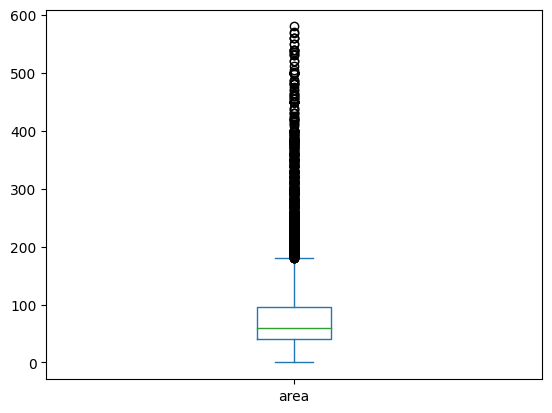

In [11]:
# Na coluna area
data.area.plot.box()

In [12]:
data= data.sort_values(by='area')
print(data.head(20))

                               address                district  area  \
7085             Rua Edmundo de Amicis                 Morumbi     0   
2983                      Rua Relíquia  Jardim das Laranjeiras     0   
9898      Rua Visconde de Porto Seguro      Jardim dos Estados     1   
962              Rua Engenheiro Bianor                 Butantã     1   
5323               Rua Solidônio Leite              Vila Ivone     2   
11055          Travessa Santa Filomena       Vila Campo Grande     4   
1223                      Rua Mussumés         Vila Maria Alta     5   
2636                 Rua das Palmeiras            Vila Buarque    10   
4735            Rua Valentim Magalhães               Água Rasa    10   
7582            Rua Conselheiro Nébias          Campos Elíseos    10   
8856            Rua Valentim Magalhães               Água Rasa    10   
5588     Rua Manoel Pereira dos Santos                  Taboão    10   
3403                 Rua das Palmeiras          Campos Elíseos  

In [13]:
# Nao fazem sentido ter um imovel com area 0 , 1 ,2 5 m^2
#Remover as primieras 7 linhas
data.drop(index=data.index[:7], inplace=True)
print(data)


                             address                   district  area  \
2636               Rua das Palmeiras               Vila Buarque    10   
4735          Rua Valentim Magalhães                  Água Rasa    10   
7582          Rua Conselheiro Nébias             Campos Elíseos    10   
8856          Rua Valentim Magalhães                  Água Rasa    10   
5588   Rua Manoel Pereira dos Santos                     Taboão    10   
...                              ...                        ...   ...   
11581              Alameda Dinamarca  Alphaville Residencial Um   560   
10237           Avenida Praia Grande             City Bussocaba   560   
9383            Avenida José Galante                Vila Suzana   568   
8553             Rua Tobias Monteiro                 Campo Belo   570   
11249                   Rua Itatinga                   Pacaembu   580   

       bedrooms  garage                type   rent  total  
2636          1       0     Studio e kitnet   1720   2136  
473

<Axes: >

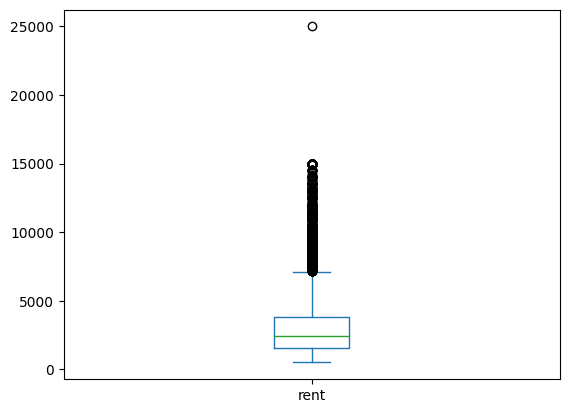

In [14]:
#Na coluna de alugel

data.rent.plot.box()

In [15]:
# Filitrando esse valor
data= data.sort_values(by='rent', ascending=False)
print(data.head(20))

                              address             district  area  bedrooms  \
6095                 Avenida Chibarás    Planalto Paulista    24         1   
8036      Rua Doutor Albuquerque Lins        Santa Cecília   202         3   
11223            Rua Convenção de Itu      Jardim Paulista   260         3   
11229                 Rua Bela Cintra           Consolação   220         3   
9933   Rua Ministro Coriolano de Góis     Jardim Marajoara   400         6   
9049                 Rua Conde Prates      Parque da Mooca   400         4   
6099                Rua Bueno Brandão  Vila Nova Conceição   167         2   
10140                    Rua Guapiaçu      Vila Clementino   400         4   
10263                     Rua Berlioz    Alto de Pinheiros   400         5   
11591  Rua Leonardo Cerveira Varandas   Paraíso do Morumbi   300         3   
9801                      Rua Tangará         Vila Mariana   220         2   
9951         Rua Joaquim José Esteves          Santo Amaro   338

In [16]:
# Encontrar o índice da linha que contém o valor máximo na coluna 'rent'
indice_max_rent = data['rent'].idxmax()

# Remover a linha que contém o valor máximo na coluna 'rent'
data = data.drop(index=indice_max_rent)

print(data)


                              address                  district  area  \
8036      Rua Doutor Albuquerque Lins             Santa Cecília   202   
11223            Rua Convenção de Itu           Jardim Paulista   260   
11229                 Rua Bela Cintra                Consolação   220   
9933   Rua Ministro Coriolano de Góis          Jardim Marajoara   400   
9049                 Rua Conde Prates           Parque da Mooca   400   
...                               ...                       ...   ...   
7420        Rua Manuel José Rodrigues                    Sacoma    20   
5901        Rua Manuel José Rodrigues                    Sacoma    40   
1188            Viela Renaldo Laporta  Vila Aurora (zona Norte)    30   
4741    Rua Manoel Oliveira Gonçalves             Jardim Jaçanã    30   
51                   Rua Tanque Velho                 Vila Nivi    45   

       bedrooms  garage         type   rent  total  
8036          3       3  Apartamento  15000  19830  
11223         3  

<Axes: >

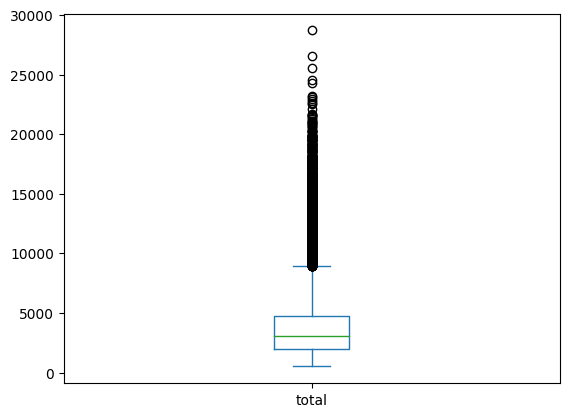

In [17]:
# Na coluna total
data.total.plot.box()

In [18]:
data= data.sort_values(by='total', ascending=False)
print(data.head(20))

                              address                 district  area  \
10144         Alameda dos Tupiniquins        Planalto Paulista   454   
9950         Rua Joaquim José Esteves              Santo Amaro   329   
10093                       Rua Edson               Campo Belo   311   
9951         Rua Joaquim José Esteves              Santo Amaro   338   
9948         Rua Joaquim José Esteves              Santo Amaro   329   
11603            Rua Domênico Perotti  Jardim Fonte do Morumbi   280   
9804                Rua Sampaio Viana                  Paraíso   240   
11178  Alameda Ministro Rocha Azevedo          Jardim Paulista   272   
8767                     Rua Cataguaz           Vila Congonhas   328   
8765                     Rua Paiaguás           Vila Congonhas   217   
11333  Alameda Ministro Rocha Azevedo          Jardim Paulista   180   
9794       Rua Doutor Tomás Carvalhal                  Paraíso   300   
11154                 Rua Bela Cintra               Consolação  

## Tratar outliers no caso de multivariaveis.

In [21]:
from pyod.models.knn import KNN
data.head(1)



ModuleNotFoundError: No module named 'pyod'

In [20]:
detector= KNN()
detector.fit(data.iloc[:,[2,3,4,6,7]])

NameError: name 'KNN' is not defined

In [22]:
previsoes=detector.labels_
previsoes

NameError: name 'detector' is not defined

In [24]:
np.unique(previsoes,return_counts=True)

NameError: name 'previsoes' is not defined

In [23]:
outliers=[]
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)
print(outliers)

NameError: name 'previsoes' is not defined

In [25]:
lista_outliers=data.iloc[outliers,:]
lista_outliers

,address,district,area,bedrooms,garage,type,rent,total


In [26]:

bairros= data['district'].unique()
print(bairros)
print(len(bairros))
print(type(bairros))


['Planalto Paulista' 'Santo Amaro' 'Campo Belo' ... 'Jardim Inga'
 'Jardim Maraba' 'Jardim Jaçanã']
1199
<class 'numpy.ndarray'>


## Criando duas colunas no DataFrame

In [ ]:

data['aluguel/area']=round(data['rent']/ data['area'],2)
data['total/area']=round(data['total']/data['area'],2)

data.head

<bound method NDFrame.head of                                address                 district  area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type   rent  total regiao  \
0             1       0  

### Separando os bairros por região

In [ ]:
import pandas as pd

Mapeamento_por_zona = {
    'aclimacao': 'Centro Ampliado',
    'adalgisa': 'Centro Ampliado',
    'aguabranca': 'Centro Ampliado',
    'aguafria': 'Norte',
    'aguafunda': 'Centro Ampliado',
    'aguarasa': 'Leste 1',
    'altodaboavista': 'Sul',
    'altodalapa': 'Centro Ampliado',
    'altodamooca': 'Leste 1',
    'altodepinheiros': 'Centro Ampliado',
    'altodoapari': 'Leste 1',
    'americanopolis': 'Sul',
    'aricanduva': 'Leste 1',
    'arturalvim': 'Leste 1',
    'barrafunda': 'Centro Ampliado',
    'barrobranco (zona Norte)': 'Norte',
    'belaalianca': 'Centro Ampliado',
    'belavista': 'Centro Ampliado',
    'belem': 'Leste 1',
    'belenzinho': 'Leste 1',
    'boacava': 'Centro Ampliado',
    'bolsaodointerlagos': 'Leste 1',
    'bomretiro': 'Centro Ampliado' ,
    'bosquedasaude': 'Centro Ampliado',
    'bras': 'Leste 1',
    'brasilandia': 'Norte',
    'brooklin': 'Centro Ampliado',
    'brooklinnovo': 'Centro Ampliado',
    'brooklinpaulista': 'Centro Ampliado',
    'burgopaulista': 'Leste 2',
    'butanta': 'Centro Ampliado',
    'cambuci': 'Centro Ampliado',
    'campininha': 'Sul',
    'campobelo': 'Sul',
    'campogrande': 'Sul',
    'camposeliseos': 'Centro Ampliado',
    'cangaiba': 'Leste 1',
    'caninde': 'Centro Ampliado',
    'capeladosocorro': 'Centro Ampliado',
    'carandiru': 'Norte',
    'casaverde': 'Norte',
    'casaverdealta': 'Norte',
    'casaverdemedia': 'Norte',
    'catumbi': 'Leste 1',
    'caxingui': 'Centro Ampliado',
    'centro': 'Centro Ampliado',
    'centrohistoricodesaopaulo': 'Centro Ampliado',
    'cerqueiracesar': 'Centro Ampliado',
    'chacarabelenzinho': 'Leste 1',
    'chacaracalifornia': 'Leste 1',
    'chacarainglesa': 'Centro Ampliado',
    'chacaraitaim': 'Centro Ampliado',
    'chacaramafalda': 'Leste 1',
    'chacarameyer': 'Sul',
    'chacaramontealegre': 'Sul',
    'chacaranossasenhoradobomconselho': 'Sul',
    'chacarasantoantonio': 'Sul',
    'chacarasantoantonio(zonaleste)': 'Leste 1',
    'chacarasantoantonio(zonasul)': 'Sul',
    'chacaraseisdeoutubro': 'Leste 1',
    'chacaratatuape': 'Leste 1',
    'chorameninno': 'Norte',
    'cidadeademar': 'Sul',
    'cidadeantonioestevaodecarvalho': 'Leste 2',
    'cidadecontinental': 'Leste 1',
    'cidadecomitila': 'Leste 1',
    'cidadedasflores': 'Centro Ampliado',
    'cidadedutra': 'Sul',
    'cidadejardim': 'Centro Ampliado',
    'cidadelider': 'Leste 2',
    'cidadeluz': 'Sul',
    'cidademaedoceu': 'Leste 1',
    'cidademoncoes': 'Centro Ampliado',
    'cidadenovasaomiguel': 'Leste 2',
    'cidadeatriarca': 'Leste 1',
    'cidadesaofrancisco': 'Centro Ampliado',
    'cidadesaomateus': 'Leste 2',
    'cidadesatelitesantasarbara': 'Leste 2',
    'cidadevargas': 'Sul',
    'cityamerica': 'Norte',
    'cocaia': 'Sul',
    'colonia(zonaLeste)': 'Leste 2',
    'conceicao': 'Sul',
    'conjuntocityjaragua': 'Norte',
    'conjuntohabitacionalpadremanoeldanobrega': 'Leste 2',
    'conjuntohabitacionalteotoniovilela': 'Leste 1',
    'conjuntopromorarsapopemba': 'Leste 1',
    'conjuntoresidencialbutanta': 'Centro Ampliado',
    'conjuntoresidencialjardimcanaa': 'Sul',
    'conjuntoresidencialjosebonifacio': 'Leste 2',
    'conjuntoresidencialvistaverde': 'Norte',
    'consolacao': 'Centro Ampliado',
    'continental': 'Centro Ampliado',
    'cursino': 'Centro Ampliado',
    'engenheirogoulart': 'Leste 1',
    'ermelinoatarazzo': 'Leste 2',
    'fazendaaricanduva': 'Leste 1',
    'fazendamorumbi': 'Centro Ampliado',
    'ferreira': 'Centro Ampliado',
    'freguesiadoo': 'Norte',
    'guaianazes':'Leste 2',
    'guaiauna':'Leste 1',
    'guapira': 'Norte',
    'higienopolis': 'Centro Ampliado',
    'hortoflorestal': 'Norte',
    'imirim': 'Norte',
    'indianopolis': 'Centro Ampliado',
    'institutodeprevidencia': 'Centro Ampliado',
    'interlagos': 'Sul',
    'ipiranga': 'Centro Ampliado',
    'itaberaba': 'Norte',
    'itaimbibi': 'Centro Ampliado',
    'itaquera': 'Leste 2',
    'jabaquara': 'Sul',
    'jacana': 'Norte',
    'jaguara': 'Centro Ampliado',
    'jaguare': 'Centro Ampliado',
    'jardimadhemar de Barros': 'Centro Ampliado',
    'jardimadutora': 'Leste 1',
    'jardimaeroporto': 'Sul',
    'jardimalfredo': 'Sul',
    'jardimalmanara': 'Norte',
    'jardimalvorada(zonaoeste)': 'Centro Ampliado',
    'jardimalzira': 'Leste 1',
    'jardimamerica': 'Centro Ampliado',
    'jardimamericadapenha': 'Leste 1',
    'jardimampliacao': 'Sul',
    'jardimanarosa': 'Centro Ampliado',
    'jardimanaliafranco': 'Leste 1',
    'jardimangela(zonaleste)': 'Leste 1',
    'jardimantartica': 'Norte',
    'jardimaricanduva': 'Leste 1',
    'jardimarize': 'Leste 1',
    'jardimarizona': 'Leste 2',
    'jardimarpoador': 'Centro Ampliado',
    'jardimatalibaleonel': 'Norte',
    'jardimavelino': 'Sul',
    'jardimbandeirantes(zonanorte)': 'Norte',
    'jardimbelgica': 'Sul',
    'jardimboavista(zonaoeste)': 'Centro Ampliado',
    'jardimbonfiglioli': 'Centro Ampliado',
    'jardimbrasil(zonanorte)': 'Norte',
    'jardimbrasil(zonasul)':'Sul',
    'jardimbrasilia(zonaleste)': 'Leste 1',
    'jardimbrasilia(zonanorte)': 'Norte',
    'jardimcabore' : 'Centro Ampliado',
    'jardimcachoeira': 'Norte',
    'jardimcampogrande': 'Sul',
    'jardimcaravelas': 'Sul',
    'jardimcasablanca': 'Sul',
    'jardimceleste': 'Centro Ampliado',
    'jardimcidadepirituba': 'Norte',
    'jardimcidalia': 'Sul',
    'jardimcolombo': 'Centro Ampliado',
    'jardimconsorcio': 'Sul',
    'jardimgdagloria': 'Centro Ampliado',
    'jardimdasacacias': 'Centro Ampliado',
    'jardimdaslaranjeiras': 'Norte',
    'jardimdasvertentes': 'Centro Ampliado',
    'jardimesmeralda': 'Centro Ampliado',
    'jardimester': 'Centro Ampliado',
    'jardimeuropa': 'Centro Ampliado',
    'jardimfilhosdaterra': 'Norte',
    'jardimfontedomorumbi': 'Centro Ampliado',
    'jardimindependencia': 'Centro Ampliado',
    'jardimindependencia(saopaulo)': 'Centro Ampliado',
    'jardimiris': 'Norte',
    'jardimjapao': 'Norte',
    'jardimleonor': 'Centro Ampliado',
    'jardimleonormendesdebarros': 'Centro Ampliado',
    'jardimlondrina': 'Centro Ampliado',
    'jardimmarajoara': 'Sul',
    'jardimoriental': 'Sul',
    'jardimparaiso': 'Norte',
    'jardimpaulista': 'Centro Ampliado',
    'jardimperi': 'Norte',
    'jardimperiperi': 'Centro Ampliado',
    'jardimprudencia': 'Sul',
    'jardimsantacruz(campogrande)': 'Sul',
    'jardimsantacruz(sacoma)': 'Centro Ampliado',
    'jardimsantaemilia': 'Sul',
    'jardimsaopaulo(zonanorte)': 'Norte',
    'jardimvilaformosa': 'Leste 1',
    'jardimvitoriaregia': 'Centro Ampliado',
    'lapa': 'Centro Ampliado',
    'lauzanepaulista': 'Norte',
    'liberdade': 'Centro Ampliado',
    'limão': 'Norte',
    'mirandopolis': 'Sul',
    'moema': 'Centro Ampliado',
    'mooca': 'Leste 1',
    'morumbi': 'Centro Ampliado',
    'nossasenhoradoo': 'Norte',
    'paradainglesa': 'Norte',
    'paraiso': 'Centro Ampliado',
    'paraiso do Morumbi': 'Centro Ampliado',
    'paraisopolis': 'Centro Ampliado',
    'parquedamooca': 'Leste 1',
    'parqueeduchaves': 'Norte',
    'parqueindustrialtomasedson': 'Centro Ampliado',
    'parquejabaquara': 'Sul',
    'parquemandaqui': 'Norte',
    'parqueperuche': 'Norte',
    'parquereboucas': 'Centro Ampliado',
    'penhadefranca': 'Leste 1',
    'perdizes': 'Centro Ampliado',
    'pinheiros': 'Centro Ampliado',
    'piqueri': 'Centro Ampliado',
    'planaltopaulista': 'Sul',
    'pompeia': 'Centro Ampliado',
    'quartaparada': 'Leste 1',
    'quintadapaineira': 'Leste 1',
    'realparque': 'Centro Ampliado',
    'republica': 'Centro Ampliado',
    'riopequeno': 'Centro Ampliado',
    'sacoma': 'Centro Ampliado',
    'santacecilia': 'Centro Ampliado',
    'santaefigenia': 'Centro Ampliado',
    'santaifigenia': 'Centro Ampliado',
    'santamaria': 'Norte',
    'santateresinha': 'Norte',
    'santana': 'Norte',
    'santoamaro': 'Sul',
    'sãolucas': 'Centro Ampliado',
    'sapopemba': 'Leste 1',
    'saude': 'Centro Ampliado',
    'se': 'Centro Ampliado',
    'siciliano': 'Centro Ampliado',
    'socorro': 'Sul',
    'sumare': 'Centro Ampliado',
    'sumarezinho': 'Centro Ampliado',
    'tatuape': 'Leste 1',
    'tremembe': 'Norte',
    'tucuruvi': 'Norte',
    'vilaalbertina': 'Norte',
    'vilaalpina': 'Centro Ampliado',
    'vilaandrade': 'Sul',
    'vilaanglobrasileira': 'Centro Ampliado',
    'vilaantonieta': 'Leste 1',
    'vilaaricanduva': 'Leste 1',
    'vilaaurora(zonanorte)': 'Norte',
    'vilababilonia': 'Sul',
    'vilabaruel': 'Norte',
    'vilabela': 'Leste 1',
    'vilabertioga': 'Leste 1',
    'vilabrasilina': 'Centro Ampliado',
    'vilabuarque': 'Centro Ampliado',
    'vilabuenosaires': 'Leste 1',
    'vilabutanta': 'Centro Ampliado',
    'vilacalifornia': 'Centro Ampliado',
    'vilacampanela': 'Leste 2',
    'vilacampestre': 'Sul',
    'vilacarrao': 'Leste 1',
    'vilaclementino': 'Centro Ampliado',
    'vilacongonhas': 'Sul',
    'vilaconstanca': 'Norte',
    'vilacordeiro': 'Centro Ampliado',
    'vilacruzeiro': 'Sul',
    'viladasaude': 'Centro Ampliado',
    'viladasmerces': 'Centro Ampliado',
    'viladiva(zonaleste)': 'Leste 1',
    'viladoencontro': 'Sul',
    'viladompedroi': 'Centro Ampliado',
    'viladompedroii': 'Centro Ampliado',
    'vilaema': 'Centro Ampliado',
    'vilaesperanca': 'Leste 1',
    'vilaformosa': 'Leste 1',
    'vilagalvao': 'Norte',
    'vilagomescardim': 'Leste 1',
    'vilagomes': 'Centro Ampliado',
    'vilaguarani(zsul)': 'Sul',
    'vilaguarani': 'Sul',
    'vilaguarani(zonaleste)': 'Leste 1',
    'vilaguilherme': 'Norte',
    'vilaguilhermina': 'Leste 1',
    'vilagumercindo': 'Centro Ampliado',
    'vilagustavo': 'Norte',
    'vilainvernada': 'Leste 1',
    'vilaipojuca': 'Centro Ampliado',
    'vilaisolinamazzei': 'Norte',
    'vilaleopoldina': 'Centro Ampliado',
    'vilamadalena': 'Centro Ampliado',
    'vilamarari': 'Sul',
    'vilamariaalta': 'Norte',
    'vilamariana': 'Centro Ampliado',
    'vilamascote': 'Sul',
    'vilamatilde': 'Leste 1',
    'vilamazzei': 'Norte',
    'vilamedeiros': 'Norte',
    'vilamarieta': 'Leste 1',
    'vilamoinhovelho': 'Centro Ampliado',
    'vilamonumento': 'Leste 1',
    'vilamontealegre': 'Sul',
    'vilamoraes': 'Centro Ampliado',
    'vilanovacachoeirinha': 'Norte',
    'vilanovaconceicao': 'Centro Ampliado',
    'vilanovamazzei': 'Norte',
    'vilanovayork': 'Leste 2',
    'vilaolimpia': 'Centro Ampliado',
    'vilapalmeiras': 'Norte',
    'vilaparquejabaquara': 'Sul',
    'vilapaulista': 'Sul',
    'vilapenteado': 'Norte',
    'vilapereirabarreto': 'Norte',
    'vilapompeia': 'Centro Ampliado',
    'vilaorogredior': 'Centro Ampliado',
    'vilaprudente': 'Centro Ampliado',
    'vilare': 'Leste 1',
    'vilaregentefeijo': 'Leste 1',
    'vilaromana': 'Centro Ampliado',
    'vilarosalia': 'Norte',
    'vilasantacatarina': 'Norte',
    'vilasantaclara': 'Leste 1',
    'vilasantamaria': 'Norte',
    'vilasantateresa (zona Sul)': 'Sul',
    'vilasantoestefano': 'Centro Ampliado',
    'vilasaojose': 'Centro Ampliado',
    'vilasiqueira (zona Norte)': 'Norte',
    'vilasofia': 'Sul',
    'vilasonia': 'Centro Ampliado',
    'vilasuzana': 'Sul',
    'vilatalarico': 'Leste 2',
    'vilauberabinha': 'Centro Ampliado',
    'vilazilda': 'Leste 1'
    }

data['regiao'] = data['district'].map(Mapeamento_por_zona)
print(data)

                               address                 district  area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type   rent  total           regiao  \
0             1       0     Studio e kitnet  